# Vector Machine Learning

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection  import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc

In [0]:
#reading in dataset
df_baseline_ento = pd.read_csv("baseline_export.csv")

#removing extraneous first column
df_baseline_ento = df_baseline_ento.drop(df_baseline_ento.columns[[0]], axis = 1)

#coding predictors and target
y = df_baseline_ento.Vector_present
X = df_baseline_ento.drop('Vector_present', axis=1)

In [0]:
df_baseline_ento['Vector_present'].value_counts()

0    1897
1     110
Name: Vector_present, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Gradient Boosting Classifier

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier

def gbc_model(X, y):# Perform Grid-Search on gradient boosted model 
    scores=['roc_auc']
    param_grid ={
    'learning_rate': (.01, .05 ,.1 ,.2, .3, .7),
    'max_depth': list(range(2,10))
    }
    for score in scores:
        clf = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, cv=5, scoring=score)
        grid_result=clf.fit(X, y)
        best_params = grid_result.best_params_
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    return grid_result

In [0]:
#Generating GBC grid
gbc_grid=gbc_model(X_train, y_train)

Best parameters set found on development set:

{'learning_rate': 0.05, 'max_depth': 9}

Grid scores on development set:

0.840 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 2}
0.836 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 3}
0.850 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 4}
0.850 (+/-0.064) for {'learning_rate': 0.01, 'max_depth': 5}
0.859 (+/-0.050) for {'learning_rate': 0.01, 'max_depth': 6}
0.859 (+/-0.050) for {'learning_rate': 0.01, 'max_depth': 7}
0.859 (+/-0.050) for {'learning_rate': 0.01, 'max_depth': 8}
0.859 (+/-0.050) for {'learning_rate': 0.01, 'max_depth': 9}
0.849 (+/-0.094) for {'learning_rate': 0.05, 'max_depth': 2}
0.844 (+/-0.080) for {'learning_rate': 0.05, 'max_depth': 3}
0.858 (+/-0.072) for {'learning_rate': 0.05, 'max_depth': 4}
0.858 (+/-0.074) for {'learning_rate': 0.05, 'max_depth': 5}
0.864 (+/-0.061) for {'learning_rate': 0.05, 'max_depth': 6}
0.869 (+/-0.053) for {'learning_rate': 0.05, 'max_depth': 7}
0.870 (+/-0.058) for {'le

##SVC

In [0]:
from sklearn.svm import SVC

def svc_model(X, y): #SupportVectorClassifier
    gammas =  [.0001, 0.001, 0.01, 0.1, 1, 10, 100, ]
    Cs=[.001, .01, .1, 1, 10]
    param_grid={
            'gamma': gammas,
            'C':Cs}
    scores=['roc_auc']
    for score in scores:
        clf = GridSearchCV(SVC(probability=True ), param_grid, cv=5, scoring=score)
        grid_result=clf.fit(X, y)
        best_params = grid_result.best_params_
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    return grid_result

In [0]:
#Generating SVC grid
svc_grid=svc_model(X_train, y_train)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1}

Grid scores on development set:

0.794 (+/-0.067) for {'C': 0.001, 'gamma': 0.0001}
0.788 (+/-0.088) for {'C': 0.001, 'gamma': 0.001}
0.839 (+/-0.129) for {'C': 0.001, 'gamma': 0.01}
0.816 (+/-0.163) for {'C': 0.001, 'gamma': 0.1}
0.768 (+/-0.127) for {'C': 0.001, 'gamma': 1}
0.720 (+/-0.104) for {'C': 0.001, 'gamma': 10}
0.750 (+/-0.073) for {'C': 0.001, 'gamma': 100}
0.755 (+/-0.142) for {'C': 0.01, 'gamma': 0.0001}
0.799 (+/-0.097) for {'C': 0.01, 'gamma': 0.001}
0.806 (+/-0.083) for {'C': 0.01, 'gamma': 0.01}
0.834 (+/-0.110) for {'C': 0.01, 'gamma': 0.1}
0.776 (+/-0.149) for {'C': 0.01, 'gamma': 1}
0.774 (+/-0.128) for {'C': 0.01, 'gamma': 10}
0.813 (+/-0.067) for {'C': 0.01, 'gamma': 100}
0.787 (+/-0.078) for {'C': 0.1, 'gamma': 0.0001}
0.810 (+/-0.092) for {'C': 0.1, 'gamma': 0.001}
0.818 (+/-0.086) for {'C': 0.1, 'gamma': 0.01}
0.832 (+/-0.106) for {'C': 0.1, 'gamma': 0.1}
0.803 (+/-0.095) for {'C': 0.1, 'g

##Feed Forward NN

In [0]:
from sklearn.neural_network import MLPClassifier

def nn_model(X, y): #neuralnetwork
    alphas =  [0.00001, 0.0001, 0.001, 0.01, 0.1, ]
    solvers = ['lbfgs', 'sgd', 'adam']
    activations=['identity', 'logistic', 'tanh', 'relu']
    param_grid={
            'alpha': alphas,
            'solver': solvers,
            'activation':activations}
    scores=['roc_auc']
    for score in scores:
        clf = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring=score)
        grid_result=clf.fit(X, y)
        best_params = grid_result.best_params_
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    return grid_result

In [0]:
#Generating FFNN grid
ffnn_grid=nn_model(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.

Best parameters set found on development set:

{'activation': 'identity', 'alpha': 0.1, 'solver': 'sgd'}

Grid scores on development set:

0.844 (+/-0.106) for {'activation': 'identity', 'alpha': 1e-05, 'solver': 'lbfgs'}
0.864 (+/-0.060) for {'activation': 'identity', 'alpha': 1e-05, 'solver': 'sgd'}
0.845 (+/-0.094) for {'activation': 'identity', 'alpha': 1e-05, 'solver': 'adam'}
0.844 (+/-0.106) for {'activation': 'identity', 'alpha': 0.0001, 'solver': 'lbfgs'}
0.864 (+/-0.060) for {'activation': 'identity', 'alpha': 0.0001, 'solver': 'sgd'}
0.846 (+/-0.094) for {'activation': 'identity', 'alpha': 0.0001, 'solver': 'adam'}
0.845 (+/-0.105) for {'activation': 'identity', 'alpha': 0.001, 'solver': 'lbfgs'}
0.864 (+/-0.060) for {'activation': 'identity', 'alpha': 0.001, 'solver': 'sgd'}
0.846 (+/-0.094) for {'activation': 'identity', 'alpha': 0.001, 'solver': 'adam'}
0.842 (+/-0.110) for {'activation': 'identity', 'alpha': 0.01, 'solver': 'lbfgs'}
0.864 (+/-0.060) for {'activation': 'i

In [0]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

def rfr_model(X, y):# Perform Grid-Search
    scores=['roc_auc']
    param_grid ={
    'max_depth': list(range(2,10)),
    'n_estimators': (50, 100, 500, 1000, 3000)
    }
    for score in scores:
        clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring=score)
        grid_result=clf.fit(X, y)
        best_params = grid_result.best_params_
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    return grid_result

In [0]:
rfr_grid=rfr_model(X_train, y_train)

Best parameters set found on development set:

{'max_depth': 9, 'n_estimators': 50}

Grid scores on development set:

0.858 (+/-0.093) for {'max_depth': 2, 'n_estimators': 50}
0.858 (+/-0.090) for {'max_depth': 2, 'n_estimators': 100}
0.860 (+/-0.084) for {'max_depth': 2, 'n_estimators': 500}
0.859 (+/-0.085) for {'max_depth': 2, 'n_estimators': 1000}
0.860 (+/-0.082) for {'max_depth': 2, 'n_estimators': 3000}
0.864 (+/-0.097) for {'max_depth': 3, 'n_estimators': 50}
0.864 (+/-0.092) for {'max_depth': 3, 'n_estimators': 100}
0.862 (+/-0.085) for {'max_depth': 3, 'n_estimators': 500}
0.862 (+/-0.082) for {'max_depth': 3, 'n_estimators': 1000}
0.861 (+/-0.081) for {'max_depth': 3, 'n_estimators': 3000}
0.863 (+/-0.082) for {'max_depth': 4, 'n_estimators': 50}
0.866 (+/-0.088) for {'max_depth': 4, 'n_estimators': 100}
0.867 (+/-0.079) for {'max_depth': 4, 'n_estimators': 500}
0.866 (+/-0.078) for {'max_depth': 4, 'n_estimators': 1000}
0.864 (+/-0.076) for {'max_depth': 4, 'n_estimators': 

In [0]:
#COMMENT IN if training
best_max_depth_gbc=gbc_grid.best_params_["max_depth"]
best_learning_rate=gbc_grid.best_params_["learning_rate"]

best_gamma=svc_grid.best_params_["gamma"]
best_c_sv=svc_grid.best_params_["C"]

best_activation=ffnn_grid.best_params_['activation']
best_alpha=ffnn_grid.best_params_['alpha']
best_solver=ffnn_grid.best_params_['solver']

best_max_depth_rf=rfr_grid.best_params_['max_depth']
best_n_estimators_rf=rfr_grid.best_params_['n_estimators']

print('GBC best max depth:')
print(gbc_grid.best_params_["max_depth"])
print('GBC best learning rate:')
print(gbc_grid.best_params_["learning_rate"])

print('SVC best gamma:')
print(svc_grid.best_params_["gamma"])
print('SVC best C:')
print(svc_grid.best_params_["C"])

print('FFNN best activation:')
print(ffnn_grid.best_params_['activation'])
print('FFNN best alpha:')
print(ffnn_grid.best_params_['alpha'])
print('FFNN best solver:')
print(ffnn_grid.best_params_['solver'])

print('RF best max depth:')
print(rfr_grid.best_params_['max_depth'])
print('RF best n_estimators:')
print(rfr_grid.best_params_['n_estimators'])

GBC best max depth:
9
GBC best learning rate:
0.05
SVC best gamma:
0.1
SVC best C:
10
FFNN best activation:
identity
FFNN best alpha:
0.1
FFNN best solver:
sgd
RF best max depth:
9
RF best n_estimators:
50


In [0]:
GBC_clf =  xgb.XGBClassifier(learning_rate=best_learning_rate, random_state=42, max_depth=best_max_depth_gbc)
SVC_clf =  SVC(gamma=best_gamma, C=best_c_sv, random_state=42, probability=True)
FFNN_clf = MLPClassifier(activation=best_activation, alpha=best_alpha, solver=best_solver, random_state=42)
RF_clf =RandomForestClassifier(max_depth=best_max_depth_rf, n_estimators=best_n_estimators_rf, random_state=42, warm_start=True, oob_score=True)

In [0]:
#Accuracy Scores
GBC_clf.fit(X_train, y_train.values.ravel())
print("Gradient Boosting Classifier model score: %.3f" % GBC_clf.score(X_test, y_test.values.ravel()))
SVC_clf.fit(X_train, y_train.values.ravel())
print("SVC model score: %.3f" % SVC_clf.score(X_test, y_test.values.ravel()))
FFNN_clf.fit(X_train, y_train.values.ravel())
print("Neural Network Classifier model score: %.3f" % FFNN_clf.score(X_test, y_test.values.ravel()))
RF_clf.fit(X_train, y_train.values.ravel())
print("Random Forest model score: %.3f" % RF_clf.score(X_test, y_test.values.ravel()))


Gradient Boosting Classifier model score: 0.963
SVC model score: 0.963
Neural Network Classifier model score: 0.948
Random Forest model score: 0.958


AUC: 0.898


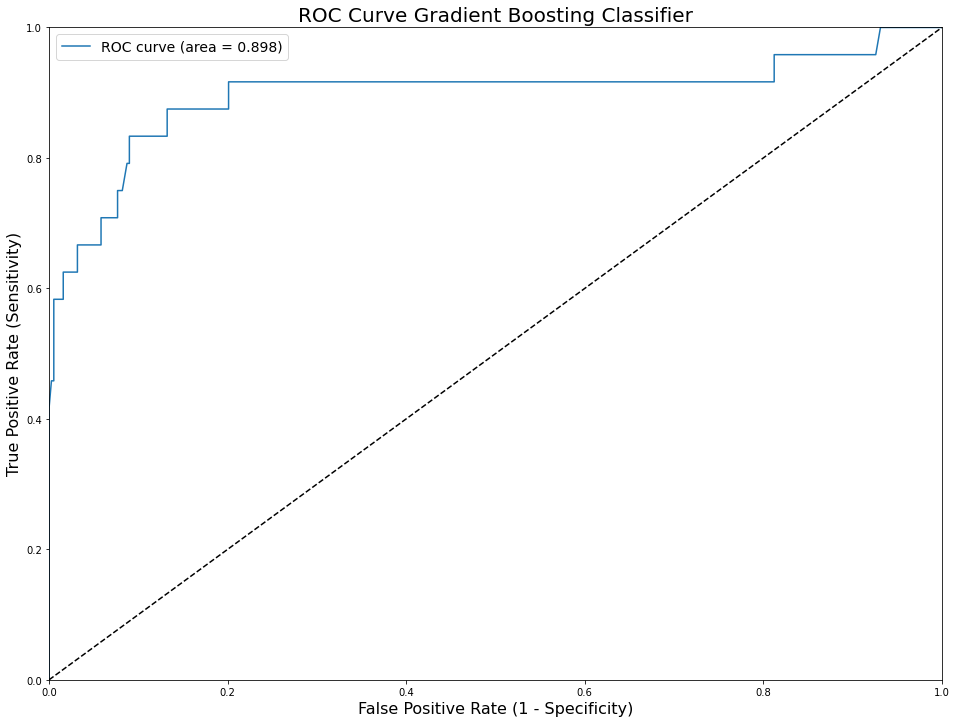

In [0]:
#AUCROC curve - GBC

y_score=GBC_clf.predict_proba(X_test)
y_score=y_score[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC: %.3f' % roc_auc)
# Plot ROC curve
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve Gradient Boosting Classifier', size=20)
plt.savefig('GBC_ROC')
plt.legend(fontsize=14);


Text(0.5, 1.0, 'GBC Precision-Recall curve: AP=0.71')

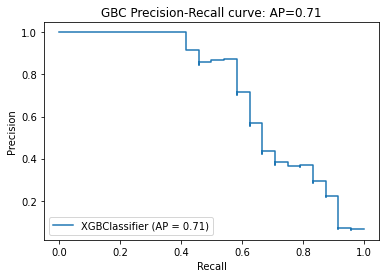

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score=GBC_clf.predict_proba(X_test)
y_score=y_score[:,1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(GBC_clf, X_test, y_test)
disp.ax_.set_title('GBC Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#plot_precision_recall_curve

In [0]:
GBC_y_pred=GBC_clf.predict(X_test)

print("GBC confusion matrix")
print(confusion_matrix(y_test.values, GBC_y_pred))

GBC confusion matrix
[[378   0]
 [ 15   9]]


In [0]:
threshold = 0.15
predicted_proba_GBC = GBC_clf.predict_proba(X_test)
predicted_GBC = (predicted_proba_GBC [:,1] >= threshold).astype('int')

print("GBC confusion matrix")
print(confusion_matrix(y_test.values, predicted_GBC))

GBC confusion matrix
[[370   8]
 [  9  15]]


AUC: 0.843


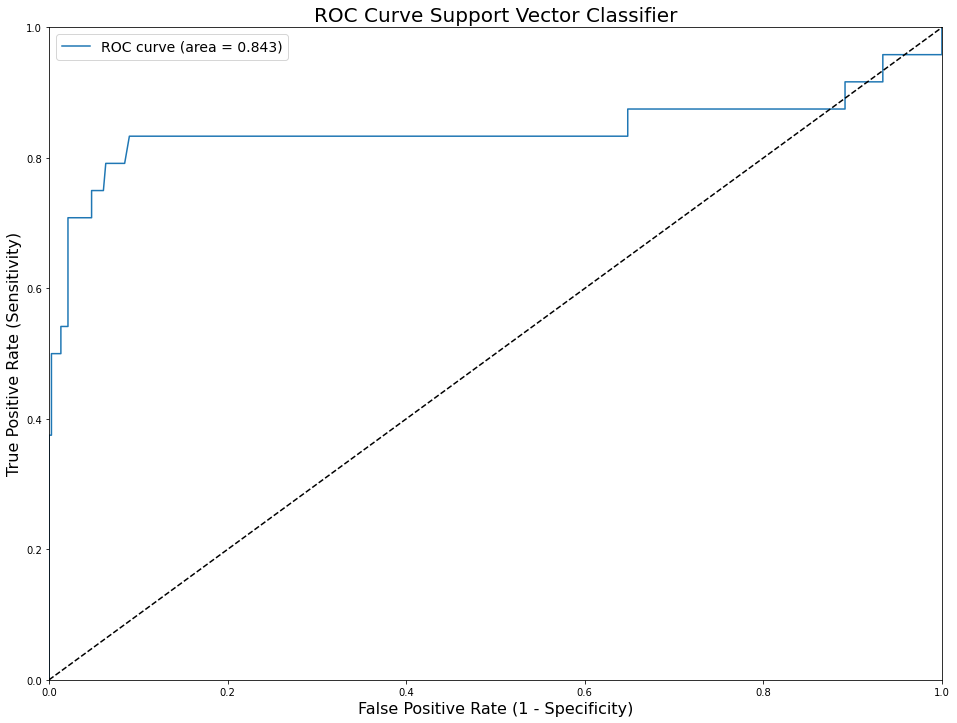

In [0]:
#AUCROC curve - SVC

y_score=SVC_clf.predict_proba(X_test)
y_score=y_score[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC: %.3f' % roc_auc)
# Plot ROC curve
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve Support Vector Classifier', size=20)
plt.savefig('SVC_ROC')
plt.legend(fontsize=14);

Text(0.5, 1.0, 'SVC Precision-Recall curve: AP=0.69')

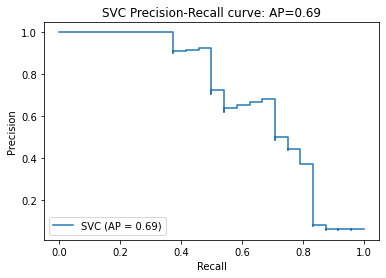

In [0]:
y_score=SVC_clf.predict_proba(X_test)
y_score=y_score[:,1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(SVC_clf, X_test, y_test)
disp.ax_.set_title('SVC Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [0]:
SVC_y_pred=SVC_clf.predict(X_test)

print("SVC confusion matrix")
print(confusion_matrix(y_test.values, SVC_y_pred))

SVC confusion matrix
[[378   0]
 [ 15   9]]


In [0]:
threshold = 0.15
predicted_proba_SVC = SVC_clf.predict_proba(X_test)
predicted_SVC = (predicted_proba_SVC [:,1] >= threshold).astype('int')

print("SVC confusion matrix")
print(confusion_matrix(y_test.values, predicted_SVC))

FF Neural Network confusion matrix
[[377   1]
 [ 14  10]]


AUC: 0.896


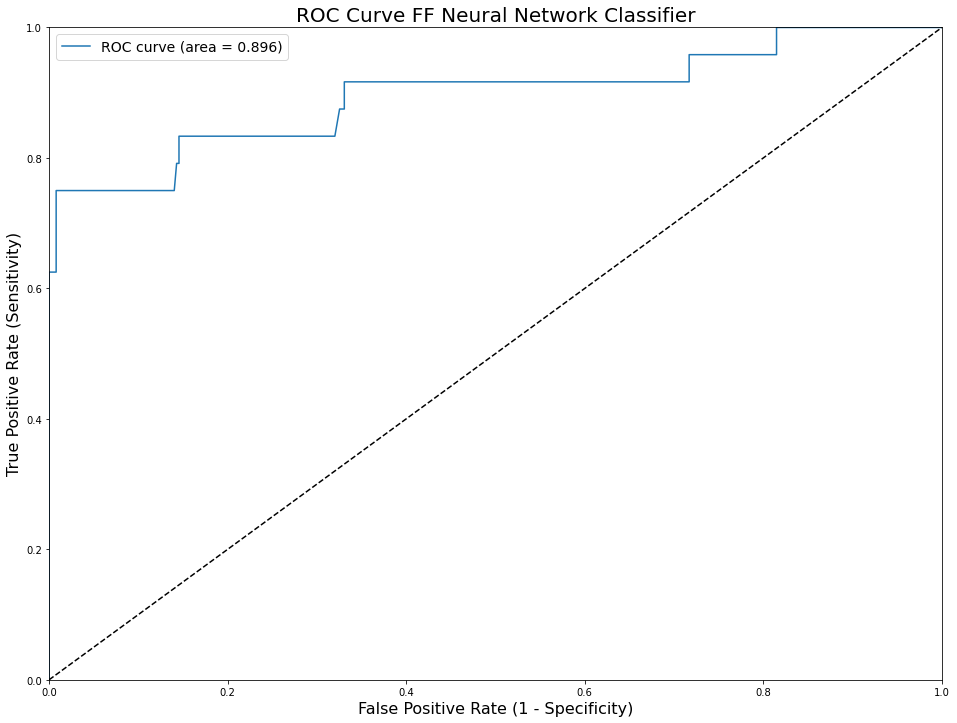

In [0]:
#AUCROC curve - FFNN

y_score=FFNN_clf.predict_proba(X_test)
y_score=y_score[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC: %.3f' % roc_auc)
# Plot ROC curve
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve FF Neural Network Classifier', size=20)
plt.savefig('NN_ROC')
plt.legend(fontsize=14);

Text(0.5, 1.0, 'FFNN Precision-Recall curve: AP=0.77')

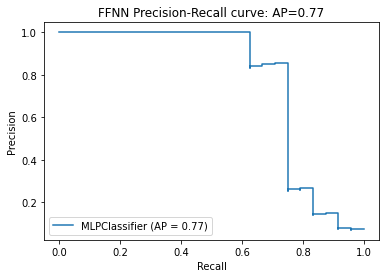

In [0]:
y_score=FFNN_clf.predict_proba(X_test)
y_score=y_score[:,1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(FFNN_clf, X_test, y_test)
disp.ax_.set_title('FFNN Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [0]:
FFNN_y_pred=FFNN_clf.predict(X_test)

print("FF Neural Network confusion matrix")
print(confusion_matrix(y_test.values, FFNN_y_pred))

FF Neural Network confusion matrix
[[378   0]
 [ 21   3]]


In [0]:
threshold = 0.15
predicted_proba_FFNN = FFNN_clf.predict_proba(X_test)
predicted_FFNN = (predicted_proba_FFNN [:,1] >= threshold).astype('int')

print("FF Neural Network confusion matrix")
print(confusion_matrix(y_test.values, predicted_FFNN))

FF Neural Network confusion matrix
[[368  10]
 [  6  18]]


AUC: 0.896


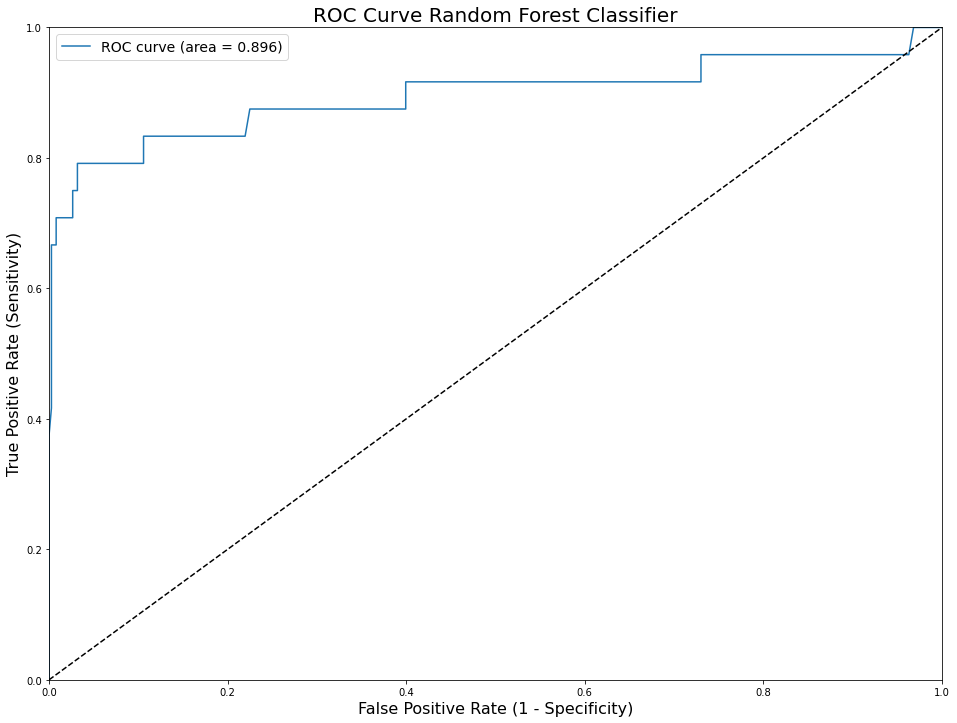

In [0]:
#AUCROC curve - RF

y_score=RF_clf.predict_proba(X_test)
y_score=y_score[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC: %.3f' % roc_auc)
# Plot ROC curve
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve Random Forest Classifier', size=20)
plt.savefig('RF_ROC')
plt.legend(fontsize=14);

Text(0.5, 1.0, 'RF Precision-Recall curve: AP=0.77')

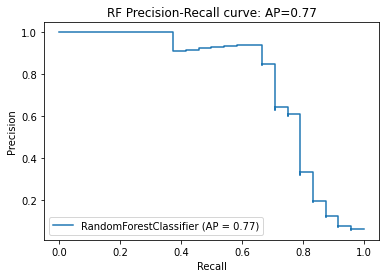

In [0]:
y_score=RF_clf.predict_proba(X_test)
y_score=y_score[:,1]
#plt.figure(figsize=(40,20))
#plt.subplots(figsize=(20, 10))
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(RF_clf, X_test, y_test)
disp.ax_.set_title('RF Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [0]:
RF_y_pred=RF_clf.predict(X_test)

print("Random Forest confusion matrix")
print(confusion_matrix(y_test.values, RF_y_pred))

#TN FP
#FN TP

Random Forest confusion matrix
[[378   0]
 [ 17   7]]


In [0]:
import random

random.seed(42)
threshold = 0.15
predicted_proba_RF = RF_clf.predict_proba(X_test)
predicted_RF = (predicted_proba_RF [:,1] >= threshold).astype('int')

print("Random Forest confusion matrix")
print(confusion_matrix(y_test.values, predicted_RF))

Random Forest confusion matrix
[[369   9]
 [  7  17]]


[Code for Permutation Chart](https://www.kaggle.com/dansbecker/permutation-importance)


In [0]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RF_clf, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, top = None, feature_names = X_train.columns.tolist())


     |████████████████████████████████| 112kB 2.9MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.0238 ± 0.0032,dummyFilled_Last week
0.0085 ± 0.0023,dummySize_Large
0.0066 ± 0.0024,dummyCover_No cover
0.0059 ± 0.0017,Number_Containers
0.0057 ± 0.0020,dummyResponsible_Grandmother
0.0054 ± 0.0010,dummyHabitat_type_Drum
0.0050 ± 0.0032,dummyFilled_Today
0.0032 ± 0.0009,dummyWaterpurpose_Nopurpose
0.0031 ± 0.0014,dummyResponsible_Mother
0.0029 ± 0.0017,dummySource_Rain


[Random Forest Permutation Importance](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html)
No longer using the boxplots, due to issues with visualization. Link still has important information about why to use permutation rather than feature importance.


#Examining the vector presence/absence for features with positive permutation importance

**maybe i should use a fisher test. look into this**

In [0]:
!pip install researchpy
import researchpy as rp
#y = df_baseline_ento.Vector_present
#X = df_baseline_ento.drop('Vector_present', axis=1)
#df_baseline_ento[df_baseline_ento['dummyFilled_Last week'] == 0]['Vector_present'].value_counts())

#Quick insights: Mother/Grandmother responsible had fewer mosquitoes than Father responsible

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_baseline_ento.shape

(2007, 48)

In [0]:
print('2x2 Filled Last Week:')
#print(pd.crosstab(df_baseline_ento['dummyFilled_Last week'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyFilled_Last week'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
#table
results

2x2 Filled Last Week:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,491.5114
1,p-value =,0.0000
2,Cramer's phi =,0.4949


In [0]:
print('2x2 Habitat - Water Drum:')
print(pd.crosstab(df_baseline_ento['dummyHabitat_type_Drum'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyHabitat_type_Drum'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
#table
results

2x2 Habitat - Water Drum:
Vector_present             0   1
dummyHabitat_type_Drum          
0                       1777  67
1                        120  43


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,149.5832
1,p-value =,0.0000
2,Cramer's phi =,0.2730


In [0]:
print('2x2 Number of Containers:') #this is unintelligible, as the values were scaled. consider creating bins and showing high vs. low risk counts
#print(pd.crosstab(df_baseline_ento['Number_Containers'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['Number_Containers'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Number of Containers:


,Chi-square test,results
0,Pearson Chi-square ( 15.0) =,21.3449
1,p-value =,0.1262
2,Cramer's V =,0.1031


In [0]:
print('2x2 Medium-Size Container:')
#print(pd.crosstab(df_baseline_ento['dummySize_Medium'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySize_Medium'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Medium-Size Container:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,28.1010
1,p-value =,0.0000
2,Cramer's phi =,0.1183


In [0]:
print('2x2 Responsible - Father:')
print(pd.crosstab(df_baseline_ento['dummyResponsible_Father'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyResponsible_Father'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Responsible - Father:
Vector_present              0   1
dummyResponsible_Father          
0                         790  64
1                        1107  46


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,11.6316
1,p-value =,0.0006
2,Cramer's phi =,0.0761


In [0]:
print('2x2 No Cover:')
print(pd.crosstab(df_baseline_ento['dummyCover_No cover'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyCover_No cover'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 No Cover:
Vector_present          0    1
dummyCover_No cover           
0                     513    8
1                    1384  102


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,21.1428
1,p-value =,0.0000
2,Cramer's phi =,0.1026


In [0]:
print('2x2 Filled Today:')
print(pd.crosstab(df_baseline_ento['dummyFilled_Today'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyFilled_Today'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Filled Today:
Vector_present        0   1
dummyFilled_Today          
0                   655  86
1                  1242  24


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,85.0738
1,p-value =,0.0000
2,Cramer's phi =,0.2059


In [0]:
print('2x2 Multipurpose Water:')
print(pd.crosstab(df_baseline_ento['dummyWaterpurpose_Multiple functions'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyWaterpurpose_Multiple functions'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Multipurpose Water:
Vector_present                           0   1
dummyWaterpurpose_Multiple functions          
0                                     1069  73
1                                      828  37


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,4.2494
1,p-value =,0.0393
2,Cramer's phi =,0.0460


In [0]:
print('2x2 Responsible - Several Housemembers:')
print(pd.crosstab(df_baseline_ento['dummyResponsible_Severalhousemembers'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyResponsible_Severalhousemembers'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Responsible - Several Housemembers:
Vector_present                           0   1
dummyResponsible_Severalhousemembers          
0                                     1692  94
1                                      205  16


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,1.4833
1,p-value =,0.2233
2,Cramer's phi =,0.0272


In [0]:
print('2x2 Habitat - Jerrycan:')
#print(pd.crosstab(df_baseline_ento['dummyHabitat_type_Jerrycan'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyHabitat_type_Jerrycan'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Habitat - Jerrycan:
Vector_present                 0   1
dummyHabitat_type_Jerrycan          
0                           1209  96
1                            688  14


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,25.3333
1,p-value =,0.0000
2,Cramer's phi =,0.1123


In [0]:
print('2x2 Water Source-Tap:')
print(pd.crosstab(df_baseline_ento['dummySource_Tap'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySource_Tap'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Water Source-Tap:
Vector_present      0   1
dummySource_Tap          
0                1131  96
1                 766  14


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,33.4603
1,p-value =,0.0000
2,Cramer's phi =,0.1291


In [0]:
print('2x2 Water Source - Rain:')
print(pd.crosstab(df_baseline_ento['dummySource_Rain'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySource_Rain'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Water Source - Rain:
Vector_present       0   1
dummySource_Rain          
0                 1177  21
1                  720  89


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,79.7293
1,p-value =,0.0000
2,Cramer's phi =,0.1993


In [0]:
print('2x2 Small-Size Container:')
print(pd.crosstab(df_baseline_ento['dummySize_Small'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySize_Small'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Small-Size Container:
Vector_present      0   1
dummySize_Small          
0                1224  79
1                 673  31


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,2.4298
1,p-value =,0.1190
2,Cramer's phi =,0.0348


In [0]:
print('2x2 Water Purpose - Laundry:')
print(pd.crosstab(df_baseline_ento['dummyWaterpurpose_Laundry'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyWaterpurpose_Laundry'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Water Purpose - Laundry:
Vector_present                0   1
dummyWaterpurpose_Laundry          
0                          1339  82
1                           558  28


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.7888
1,p-value =,0.3745
2,Cramer's phi =,0.0198


In [0]:
print('2x2 Habitat - Tire:')
print(pd.crosstab(df_baseline_ento['dummyHabitat_type_Tire'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyHabitat_type_Tire'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Habitat - Tire:
Vector_present             0   1
dummyHabitat_type_Tire          
0                       1847  96
1                         50  14


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,34.2980
1,p-value =,0.0000
2,Cramer's phi =,0.1307


In [0]:
print('2x2 Water Purpose - None:')
print(pd.crosstab(df_baseline_ento['dummyWaterpurpose_Nopurpose'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyWaterpurpose_Nopurpose'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Water Purpose - None:
Vector_present                  0   1
dummyWaterpurpose_Nopurpose          
0                            1745  76
1                             152  34


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,64.8217
1,p-value =,0.0000
2,Cramer's phi =,0.1797


In [0]:
print('2x2 Covered Completely:')
print(pd.crosstab(df_baseline_ento['dummyCover_Completely'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyCover_Completely'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Covered Completely:
Vector_present            0    1
dummyCover_Completely           
0                      1420  103
1                       477    7


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,20.0408
1,p-value =,0.0000
2,Cramer's phi =,0.0999


In [0]:
print('2x2 Filled Last Month:')
#print(pd.crosstab(df_baseline_ento['dummyFilled_last month'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyFilled_last month'], df_baseline_ento['Vector_present'], prop= 'col', test= 'fisher')
table
results

2x2 Filled Last Month:


,Fisher's exact test,results
0,Odds ratio =,35.1111
1,2 sided p-value =,0.0086
2,Left tail p-value =,0.9998
3,Right tail p-value =,0.0086
4,Cramer's phi =,0.1040


In [0]:
print('2x2 Covering Not Possible:')
print(pd.crosstab(df_baseline_ento['dummyCover_Not possible'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyCover_Not possible'], df_baseline_ento['Vector_present'], prop= 'col', test= 'fisher')
table
results

2x2 Covering Not Possible:
Vector_present              0    1
dummyCover_Not possible           
0                        1889  109
1                           8    1


,Fisher's exact test,results
0,Odds ratio =,2.1663
1,2 sided p-value =,0.3985
2,Left tail p-value =,0.9167
3,Right tail p-value =,0.3985
4,Cramer's phi =,0.0166


In [0]:
print('2x2 Water Source - Borehole:')
#print(pd.crosstab(df_baseline_ento['dummySource_Borehole'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySource_Borehole'], df_baseline_ento['Vector_present'], prop= 'col', test= 'fisher')
table
results

2x2 Water Source - Borehole:


,Fisher's exact test,results
0,Odds ratio =,0.3016
1,2 sided p-value =,0.3683
2,Left tail p-value =,0.1691
3,Right tail p-value =,0.9616
4,Cramer's phi =,0.0280


In [0]:
print('2x2 Habitat - Bucket:')
print(pd.crosstab(df_baseline_ento['dummyHabitat_type_Bucket'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyHabitat_type_Bucket'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Habitat - Bucket:
Vector_present               0   1
dummyHabitat_type_Bucket          
0                         1183  82
1                          714  28


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,6.6234
1,p-value =,0.0101
2,Cramer's phi =,0.0574


In [0]:
print('2x2 Responsible - Grandmother:')
print(pd.crosstab(df_baseline_ento['dummyResponsible_Grandmother'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyResponsible_Grandmother'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Responsible - Grandmother:
Vector_present                   0   1
dummyResponsible_Grandmother          
0                             1835  98
1                               62  12


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,17.0930
1,p-value =,0.0000
2,Cramer's phi =,0.0923


In [0]:
print('2x2 Responsible - Mother:')
#print(pd.crosstab(df_baseline_ento['dummyResponsible_Mother'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyResponsible_Mother'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Responsible - Mother:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,18.8238
1,p-value =,0.0000
2,Cramer's phi =,0.0968


In [0]:
print('2x2 Rained in Last 7 Days:')
#print(pd.crosstab(df_baseline_ento['Rain_7days'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['Rain_7days'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Rained in Last 7 Days:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4125
1,p-value =,0.5207
2,Cramer's phi =,0.0143


In [0]:
print('2x2 Habitat - Small Domestic Container:')
#print(pd.crosstab(df_baseline_ento['dummyHabitat_type_SDC'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyHabitat_type_SDC'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Habitat - Small Domestic Container:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,2.0676
1,p-value =,0.1505
2,Cramer's phi =,0.0321


In [0]:
print('2x2 Filled Yesterday:')
print(pd.crosstab(df_baseline_ento['dummyFilled_Yesterday'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyFilled_Yesterday'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results



2x2 Filled Yesterday:
Vector_present            0   1
dummyFilled_Yesterday          
0                      1336  96
1                       561  14


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,14.4337
1,p-value =,0.0001
2,Cramer's phi =,0.0848


In [0]:
print('2x2 Source - Well:')
#print(pd.crosstab(df_baseline_ento['dummySource_Well'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySource_Well'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Source - Well:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,12.1764
1,p-value =,0.0005
2,Cramer's phi =,0.0779


In [0]:
print('2x2 Large Container:')
#print(pd.crosstab(df_baseline_ento['dummySize_Large'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummySize_Large'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Large Container:


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,172.9543
1,p-value =,0.0000
2,Cramer's phi =,0.2936


In [0]:
print('2x2 Number of Containers:')
print(pd.crosstab(df_baseline_ento['Number_Containers'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['Number_Containers'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Number of Containers:
Vector_present       0   1
Number_Containers         
0.000000            64  10
0.066667           211  12
0.133333           350  22
0.200000           313  21
0.266667           401  25
0.333333           264   9
0.400000            98   5
0.466667            42   1
0.533333             9   0
0.600000            48   1
0.666667            10   1
0.733333            21   3
0.800000            23   0
0.866667            26   0
0.933333             8   0
1.000000             9   0


,Chi-square test,results
0,Pearson Chi-square ( 15.0) =,21.3449
1,p-value =,0.1262
2,Cramer's V =,0.1031


In [0]:
print('2x2 Partial Shade:')
#print(pd.crosstab(df_baseline_ento['dummyShade_Partial'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyShade_Partial'], df_baseline_ento['Vector_present'], prop= 'col', test= 'fisher')
table
results

2x2 Partial Shade:


,Fisher's exact test,results
0,Odds ratio =,0.9272
1,2 sided p-value =,0.6179
2,Left tail p-value =,0.6179
3,Right tail p-value =,0.7619
4,Cramer's phi =,0.0016


In [0]:
print('2x2 Full Shade:')
#print(pd.crosstab(df_baseline_ento['dummyShade_Fullshade'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyShade_Fullshade'], df_baseline_ento['Vector_present'], prop= 'col', test= 'fisher')
table
results


2x2 Full Shade:


,Fisher's exact test,results
0,Odds ratio =,3.4716
1,2 sided p-value =,0.2873
2,Left tail p-value =,0.9614
3,Right tail p-value =,0.2873
4,Cramer's phi =,0.0269


In [0]:
print('2x2 Responsible - Children:')
#print(pd.crosstab(df_baseline_ento['dummyResponsible_Children'], df_baseline_ento['Vector_present']))
table, results = rp.crosstab(df_baseline_ento['dummyResponsible_Children'], df_baseline_ento['Vector_present'], prop= 'col', test= 'chi-square')
table
results

2x2 Responsible - Children:
Vector_present                0   1
dummyResponsible_Children          
0                          1470  90
1                           427  20


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,1.1247
1,p-value =,0.2889
2,Cramer's phi =,0.0237


In [0]:
pd.crosstab(df_baseline_ento['dummyFilled_Last week'], df_baseline_ento['Vector_present'])



Vector_present,0,1
dummyFilled_Last week,,
0,1807,40
1,90,70


#Better PCA - Use this [source](https://github.com/gaurav-kaushik/Data-Visualizations-Medium)

need to remove the part about scaling. data are already scaled and this is therefore irrelevant

In [0]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline

In [0]:
def get_float_list(range_max:int, div:int=100) -> list:
    """ To get 0 -> 1, range_max must be same order of mag as div """
    return [float(x)/div for x in range(int(range_max))]


def get_colorcycle(colordict:dict):
    """ Subset cnames with a string match and get a color cycle for plotting """
    return cycle(list(colordict.keys()))


def get_colordict(filter_:str='dark') -> dict:
    """ return dictionary of colornames by filter """
    return dict((k, v) for k, v in cnames.items() if filter_ in k)


def pca_report_interactive(X, scale_X:bool=True, save_plot:bool=False):
    """
    X:          input data matrix
    scale_X:    determine whether to rescale X (StandardScaler) [default: True, X is not prescaled
    save_plot:  save plot to file (html) and not show
    """

    # calculate mean and var
    X_mean, X_var = X.mean(), X.var()
    print('\n*--- PCA Report ---*\n')
    print(f'X mean:\t\t{X_mean:.3f}\nX variance:\t{X_var:.3f}')

    if scale_X:
        # rescale and run PCA
        print("\n...Rescaling data...\n")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_s_mean, X_s_var = X_scaled.mean(), X_scaled.var()
        print(f'X_scaled mean:\t\t{np.round(X_s_mean):.3f}')
        print(f'X_scaled variance:\t{np.round(X_s_var):.3f}\n')
        pca_ = PCA().fit(X_scaled)
        X_pca = PCA().fit_transform(X)
    else:
        # run PCA directly
        print("...Assuming data is properly scaled...")
        pca_ = PCA().fit(X)
        X_pca = PCA().fit_transform(X)
            
    # Get cumulative explained variance for each dimension
    pca_evr = pca_.explained_variance_ratio_
    cumsum_ = np.cumsum(pca_evr)
    
    # Get dimensions where var >= 95% and values for variance at 2D, 3D
    dim_95 = np.argmax(cumsum_ >= 0.95) + 1
    twoD = np.round(cumsum_[1], decimals=3)*100 
    threeD = np.round(cumsum_[2], decimals=3)*100
    instances_, dims_ =  X.shape
    
    # check shape of X
    if dims_ > instances_:
        print("WARNING: number of features greater than number of instances.")
        dimensions = list(range(1, instances_+1))
    else:
        dimensions = list(range(1, dims_+1))
    
    # Print report
    print("\n -- Summary --")
    print(f"You can reduce from {dims_} to {dim_95} dimensions while retaining 95% of variance.")
    print(f"2 principal components explain {twoD:.2f}% of variance.")
    print(f"3 principal components explain {threeD:.2f}% of variance.")
    
    """ - Plotting - """
    # Create custom HoverTool -- we'll name each ROC curve 'ROC' so we only see info on hover there
    hover_ = HoverTool(names=['PCA'], tooltips=[("dimensions", "@x_dim"), 
                                                ("cumulative variance", "@y_cumvar"),
                                                ("explained variance", "@y_var")])
    p_tools = [hover_, 'crosshair', 'zoom_in', 'zoom_out', 'save', 'reset', 'tap', 'box_zoom']

    # insert 0 at beginning for cleaner plotting
    cumsum_plot = np.insert(cumsum_, 0, 0) 
    pca_evr_plot = np.insert(pca_evr, 0, 0)
    dimensions_plot = np.insert(dimensions, 0, 0)

    """
    ColumnDataSource
    - a special type in Bokeh that allows you to store data for plotting
    - store data as dict (key:list)
    - to plot two keys against one another, make sure they're the same length!
    - below:
        x_dim    # of dimensions (length = # of dimensions)
        y_cumvar # cumulative variance (length = # of dimensions)
        var_95   # y = 0.95 (length = # of dimensions)
        zero_one # list of 0 to 1
        twoD     # x = 2 
        threeD   # x = 3 
    """ 
    
    # get sources
    source_PCA = ColumnDataSource(data=dict(x_dim = dimensions_plot,y_cumvar = cumsum_plot, y_var = pca_evr_plot))    
    source_var95 = ColumnDataSource(data=dict(var95_x = [dim_95]*96, var95_y = get_float_list(96)))
    source_twoD = ColumnDataSource(data=dict(twoD_x = [2]*(int(twoD)+1), twoD_y = get_float_list(twoD+1)))
    source_threeD = ColumnDataSource(data=dict(threeD_x = [3]*(int(threeD)+1), threeD_y = get_float_list(threeD+1)))

    """ PLOT """
    # set up figure and add axis labels
    p = figure(title='PCA Analysis', tools=p_tools)
    p.xaxis.axis_label = f'N of {dims_} Principal Components' 
    p.yaxis.axis_label = 'Variance Explained (per PC & Cumulative)'
    
    # add reference lines: y=0.95, x=2, x=3
    p.line('twoD_x', 'twoD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_twoD) # x=2
    p.line('threeD_x', 'threeD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_threeD) # x=3
    p.line('var95_x', 'var95_y', line_width=2, line_dash='dotted', color='#435363', source=source_var95) # var = 0.95

    # add bar plot for variance per dimension
    p.vbar(x='x_dim', top='y_var', width=.5, bottom=0, color='#D9F2EF', source=source_PCA, name='PCA')
    
    # add cumulative variance (scatter + line)
    p.line('x_dim', 'y_cumvar', line_width=1, color='#F79737', source=source_PCA)
    p.circle('x_dim', 'y_cumvar', size=7, color='#FF4C00', source=source_PCA, name='PCA')

    # change gridlines
    p.ygrid.grid_line_alpha = 0.25
    p.xgrid.grid_line_alpha = 0.25

    # change axis bounds and grid
    p.xaxis.bounds = (0, dims_)
    p.yaxis.bounds = (0, 1)
    p.grid.bounds = (0, dims_)

    # save and show p
    if save_plot:
        output_file('PCA_analysis.html')
    show(p)
        
    # output PCA info as a dataframe
    df_PCA = pd.DataFrame({'dimension': dimensions, 'variance_cumulative': cumsum_, 'variance': pca_evr}).set_index(['dimension'])
        
    return df_PCA, X_pca, pca_evr


def pca_feature_correlation(X, X_pca, explained_var, features:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    1. Get dot product of X and X_pca
    2. Run normalizations of X*X_pca
    3. Retrieve df/matrices

    X:               data (numpy matrix)
    X_pca:           PCA
    explained_var:   explained variance matrix
    features:        list of feature names
    fig_dpi:         dpi to use for heatmaps
    save_plot:       save plot to file (html) and not show
    """
    
    # Add zeroes for data where features > instances
    outer_diff = X.T.shape[0] - X_pca.shape[1]
    if outer_diff > 0: # outer dims must match to get sq matrix
        Z = np.zeros([X_pca.shape[0], outer_diff])
        X_pca = np.c_[X_pca, Z]
        explained_var = np.append(explained_var, np.zeros(outer_diff))
    
    # Get correlation between original features (X) and PCs (X_pca)
    dot_matrix = np.dot(X.T, X_pca)
    print(f"X*X_pca: {X.T.shape} * {X_pca.shape} = {dot_matrix.shape}")
    
    # Correlation matrix -> df
    df_dotproduct = pd.DataFrame(dot_matrix)
    df_dotproduct.columns = [''.join(['PC', f'{i+1}']) for i in range(dot_matrix.shape[0])]
    if any(features): df_dotproduct.index = features    
    
    # Normalize & Sort
    df_n, df_na, df_nabv = normalize_dataframe(df_dotproduct, explained_var, plot_opt=True, save_plot=save_plot)
    
    return df_dotproduct, df_n, df_na, df_nabv


def normalize_dataframe(df, explained_var=None, fig_dpi:int=150, plot_opt:bool=True, save_plot:bool=False):
    """
    1. Get z-normalized df (normalized to µ=0, σ=1)
    2. Get absolute value of z-normalized df
    3. If explained_variance matrix provided, dot it w/ (2)
    """
    # Normalize, Reindex, & Sort
    df_norm = (df.copy()-df.mean())/df.std()
    df_norm = df_norm.sort_values(list(df_norm.columns), ascending=False)
    
    # Absolute value of normalized (& sort)
    df_abs = df_norm.copy().abs().set_index(df_norm.index)
    df_abs = df_abs.sort_values(by=list(df_abs.columns), ascending=False)
    
    # Plot
    if plot_opt:
        # Z-normalized corr matrix
        plt.figure(dpi=fig_dpi)
        ax_normal = sns.heatmap(df_norm, cmap="RdBu")
        ax_normal.set_title("Z-Normalized Data")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix.png')
        else:
            plt.show()

        # |Z-normalized corr matrix|  
        plt.figure(dpi=fig_dpi)
        ax_abs = sns.heatmap(df_abs, cmap="Purples")
        ax_abs.set_title("|Z-Normalized|")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix_Abs.png')
        else:
            plt.show()
        
    # Re-normalize by explained var (& sort)
    if explained_var.any():
        df_byvar = df_abs.copy()*explained_var
        df_byvar = df_byvar.sort_values(by=list(df_norm.columns), ascending=False)
        if plot_opt:
            plt.figure(dpi=fig_dpi)
            ax_relative = sns.heatmap(df_byvar, cmap="Purples")
            ax_relative.set_title("|Z-Normalized|*Explained_Variance")
            if save_plot:
                plt.savefig('Normalized_corr_matrix.png')
            else:
                plt.show()
    else:
        df_byvar = None
    return df_norm, df_abs, df_byvar


def pca_rank_features(df_nabv, verbose:bool=True):
    """
    Given a dataframe df_nabv with dimensions [f, p], where:
        f = features (sorted)
        p = principal components
        df_nabv.values are |Z-normalized X|*pca_.explained_variance_ratio_
        
    1. Create column of sum of each row, sort by it 'score_'
    3. Set index as 'rank'
    """
    df_rank = df_nabv.copy().assign(score_ = df_nabv.sum(axis=1)).sort_values('score_', ascending=False)
    df_rank['feature_'] = df_rank.index
    df_rank.index = range(1, len(df_rank)+1)
    df_rank.drop(df_nabv.columns, axis=1, inplace=True)
    df_rank.index.rename('rank', inplace=True)
    if verbose: print(df_rank)
    return df_rank


def pca_full_report(X, features_:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    Run complete PCA workflow:
        1. pca_report_interactive()
        2. pca_feature_correlation()
        3. pca_rank_features()
        
    X:            data (numpy array)
    features_:    list of feature names
    fig_dpi:      image resolution
    
    """
    # Retrieve the interactive report
    df_pca, X_pca, pca_evr = pca_report_interactive(X, scale_X = False, save_plot=save_plot)
    # Get feature-PC correlation matrices
    df_corr, df_n, df_na, df_nabv = pca_feature_correlation(X, X_pca, pca_evr, features_, fig_dpi, save_plot) 
    # Get rank for each feature
    df_rank = pca_rank_features(df_nabv)
    return (df_pca, X_pca, pca_evr, df_corr, df_n, df_na, df_nabv, df_rank)


*--- PCA Report ---*

X mean:		0.196
X variance:	0.158
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 48 to 20 dimensions while retaining 95% of variance.
2 principal components explain 30.50% of variance.
3 principal components explain 41.70% of variance.


X*X_pca: (48, 2007) * (2007, 48) = (48, 48)


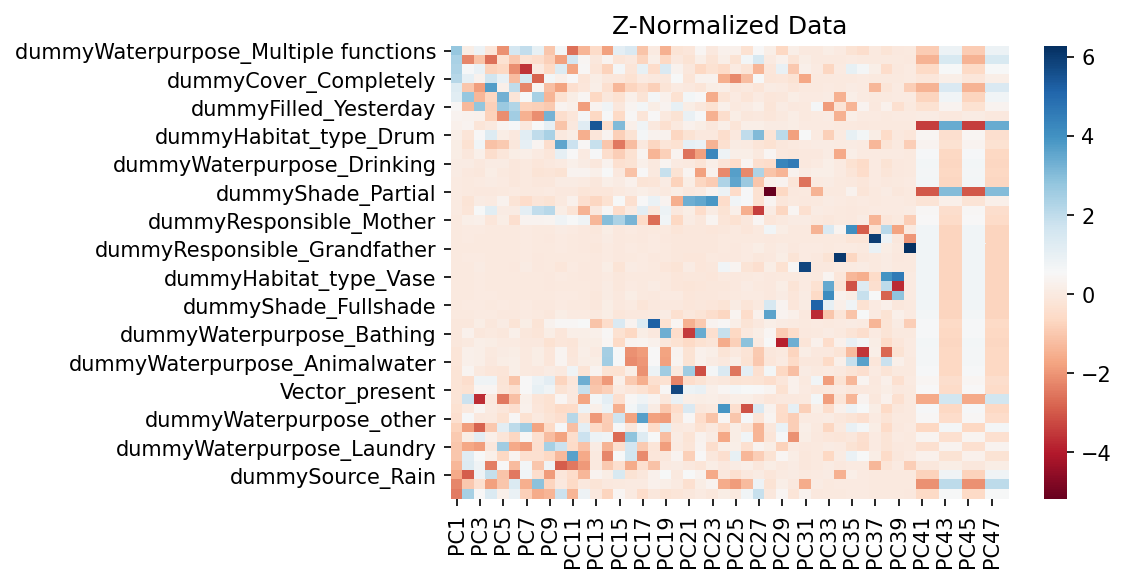

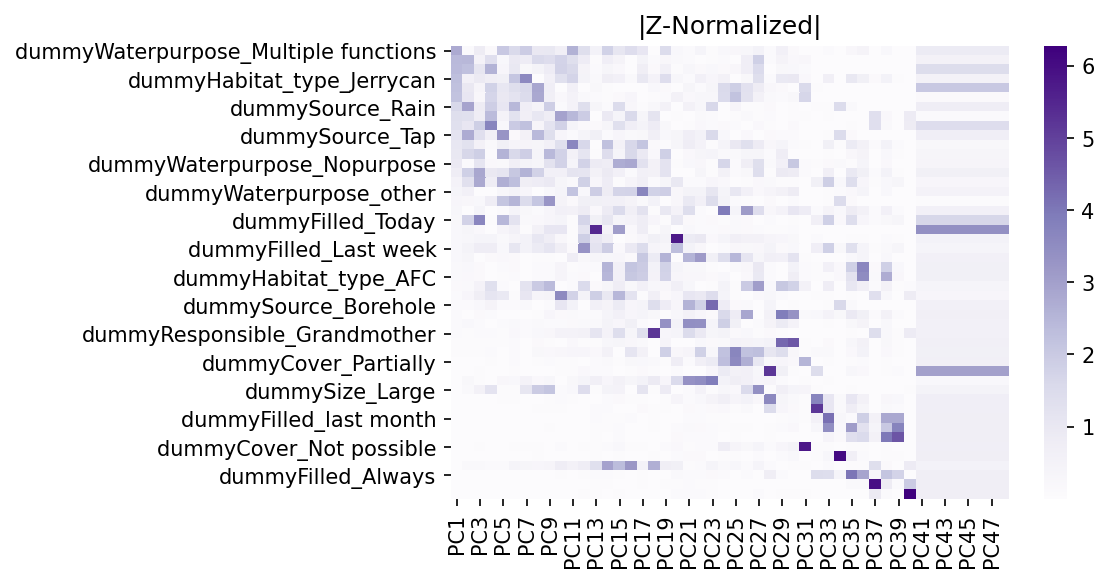

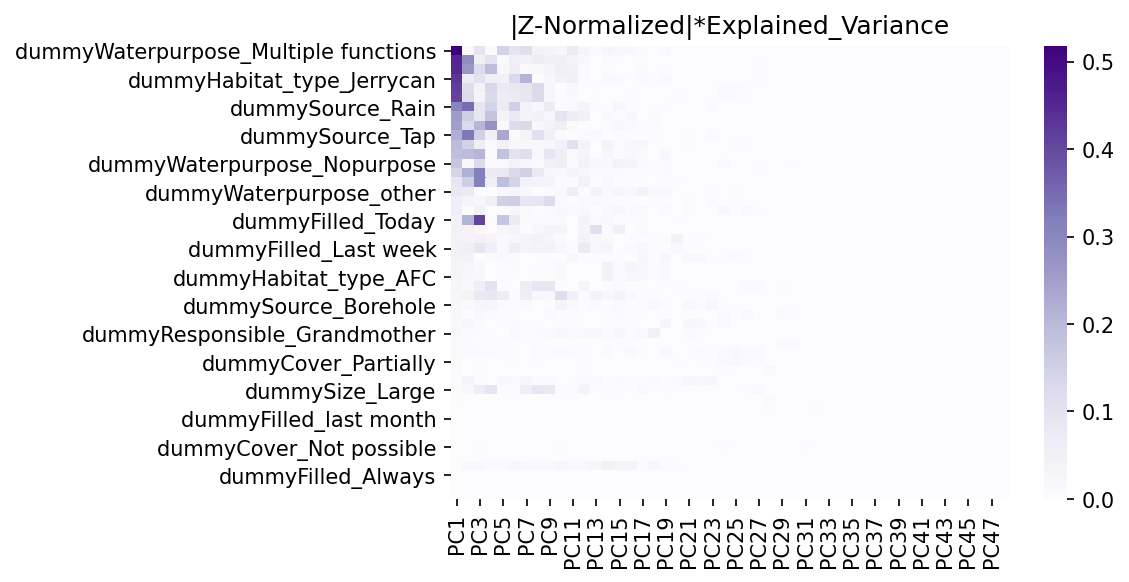

        score_                              feature_
rank                                                
1     1.374843              dummyHabitat_type_Bucket
2     1.367703                      dummySource_Rain
3     1.349645                      dummySize_Medium
4     1.328622               dummyResponsible_Father
5     1.321783  dummyWaterpurpose_Multiple functions
6     1.314409                       dummySize_Small
7     1.303665             dummyWaterpurpose_Laundry
8     1.271699                       dummySource_Tap
9     1.261134            dummyHabitat_type_Jerrycan
10    1.187008             dummyResponsible_Children
11    1.183801                   dummyCover_No cover
12    1.183024                 dummyFilled_Yesterday
13    1.157453                 dummyCover_Completely
14    1.082103                     dummyFilled_Today
15    0.897671                      dummySource_Well
16    0.865889                 dummyHabitat_type_SDC
17    0.758443           dummyWaterpurpose_Nop

In [0]:
""" Entomology """
data = df_baseline_ento
ento_outputs = pca_full_report(X=data.to_numpy(), features_=data.columns)

#Plotting the PCA- not aesthetic. don't use [Source](https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis)

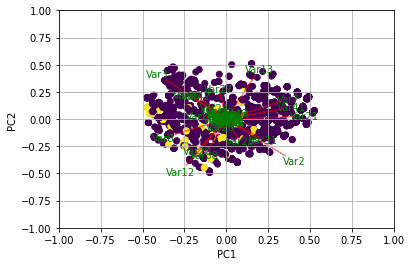

In [0]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

y = df_baseline_ento.Vector_present
X = df_baseline_ento.drop('Vector_present', axis=1)


#In general a good idea is to scale the data 

pca = PCA()
x_new = pca.fit_transform(X)


def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

# TSNE [Source](https://towardsdatascience.com/t-sne-python-example-1ded9953f26)

In [0]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

y = df_baseline_ento.Vector_present
X = df_baseline_ento.drop('Vector_present', axis=1)
MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 5


def fit(X):
    n_samples = X.shape[0]
    
    # Compute euclidean distance
    distances = pairwise_distances(X, metric='euclidean', squared=True)
    
    # Compute joint probabilities p_ij from distances.
    P = _joint_probabilities(distances=distances, desired_perplexity=perplexity, verbose=False)
    
    # The embedding is initialized with iid samples from Gaussians with standard deviation 1e-4.
    X_embedded = 1e-4 * np.random.mtrand._rand.randn(n_samples, n_components).astype(np.float32)
    
    # degrees_of_freedom = n_components - 1 comes from
    # "Learning a Parametric Embedding by Preserving Local Structure"
    # Laurens van der Maaten, 2009.
    degrees_of_freedom = max(n_components - 1, 1)
    
    return _tsne(P, degrees_of_freedom, n_samples, X_embedded=X_embedded)

In [0]:
def _tsne(P, degrees_of_freedom, n_samples, X_embedded):
  params = X_embedded.ravel()
  obj_func = _kl_divergence
  params = _gradient_descent(obj_func, params, [P, degrees_of_freedom, n_samples, n_components])
  X_embedded = params.reshape(n_samples, n_components)

  return X_embedded

In [0]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

In [0]:
def _kl_divergence(params, P, degrees_of_freedom, n_samples, n_components):
    X_embedded = params.reshape(n_samples, n_components)
    
    dist = pdist(X_embedded, "sqeuclidean")
    dist /= degrees_of_freedom
    dist += 1.
    dist **= (degrees_of_freedom + 1.0) / -2.0
    Q = np.maximum(dist / (2.0 * np.sum(dist)), MACHINE_EPSILON)
    
    # Kullback-Leibler divergence of P and Q
    kl_divergence = 2.0 * np.dot(P, np.log(np.maximum(P, MACHINE_EPSILON) / Q))
    
    # Gradient: dC/dY
    grad = np.ndarray((n_samples, n_components), dtype=params.dtype)
    PQd = squareform((P - Q) * dist)
    for i in range(n_samples):
        grad[i] = np.dot(np.ravel(PQd[i], order='K'),
                         X_embedded[i] - X_embedded)
    grad = grad.ravel()
    c = 2.0 * (degrees_of_freedom + 1.0) / degrees_of_freedom
    grad *= c
    
    return kl_divergence, grad

In [0]:
def _gradient_descent(obj_func, p0, args, it=0, n_iter=5000,
                      n_iter_check=1, n_iter_without_progress=300,
                      momentum=0.8, learning_rate=500.0, min_gain=0.01,
                      min_grad_norm=1e-7):
    
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = i = it
    
    for i in range(it, n_iter):
      error, grad = obj_func(p, *args)
      grad_norm = linalg.norm(grad)
      inc = update * grad < 0.0
      dec = np.invert(inc)
      gains[inc] += 0.2
      gains[dec] *= 0.8
      np.clip(gains, min_gain, np.inf, out=gains)
      grad *= gains
      update = momentum * update - learning_rate * grad
      p += update
    
      print("[t-SNE] Iteration %d: error = %.7f,"
                      " gradient norm = %.7f"
                      % (i + 1, error, grad_norm))
        
      if error < best_error:
                best_error = error
                best_iter = i
      elif i - best_iter > n_iter_without_progress:
        break
        
      if grad_norm <= min_grad_norm:
        break
    return p

Streaming output truncated to the last 5000 lines.
[t-SNE] Iteration 2: error = 5.6970693, gradient norm = 0.0000087
[t-SNE] Iteration 3: error = 5.6970692, gradient norm = 0.0000182
[t-SNE] Iteration 4: error = 5.6970687, gradient norm = 0.0000447
[t-SNE] Iteration 5: error = 5.6970652, gradient norm = 0.0001205
[t-SNE] Iteration 6: error = 5.6970349, gradient norm = 0.0003517
[t-SNE] Iteration 7: error = 5.6967343, gradient norm = 0.0011029
[t-SNE] Iteration 8: error = 5.6933606, gradient norm = 0.0036472
[t-SNE] Iteration 9: error = 5.6544472, gradient norm = 0.0111549
[t-SNE] Iteration 10: error = 5.3752946, gradient norm = 0.0191198
[t-SNE] Iteration 11: error = 4.7368015, gradient norm = 0.0155519
[t-SNE] Iteration 12: error = 4.1361902, gradient norm = 0.0105825
[t-SNE] Iteration 13: error = 3.6804861, gradient norm = 0.0082452
[t-SNE] Iteration 14: error = 3.3288695, gradient norm = 0.0073750
[t-SNE] Iteration 15: error = 3.0504815, gradient norm = 0.0078243
[t-SNE] Iteration 1

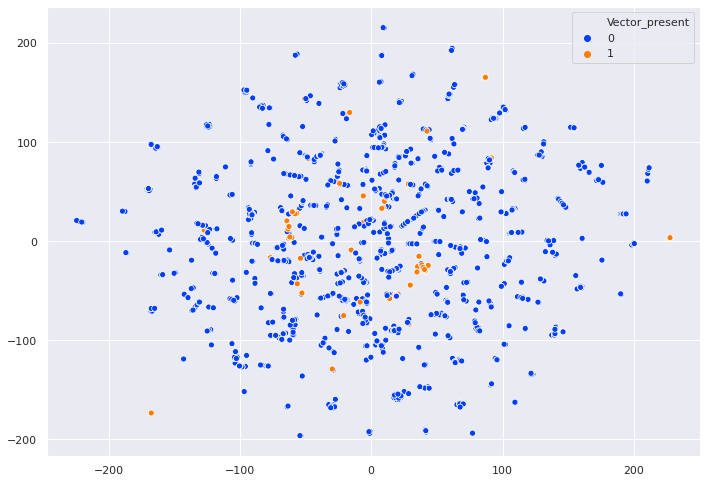

In [0]:
X_embedded = fit(X)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

Text(0.5, 1.0, 'TSNE')

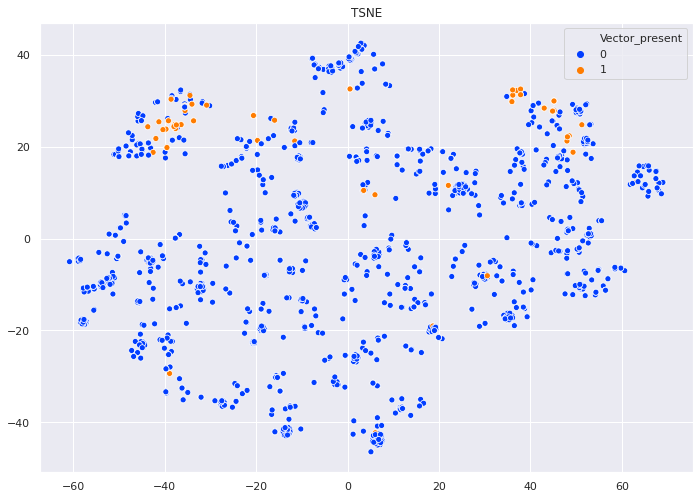

In [0]:
tsne = TSNE(n_components = 2, perplexity= 30, learning_rate= 200, n_iter= 1000)
X_embedded = tsne.fit_transform(X)
ax = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
ax.set_title("TSNE")